In [1]:

# Loading the required Python libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv('https://raw.githubusercontent.com/p-sama/Glass-Classification/master/glass.csv')
Data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

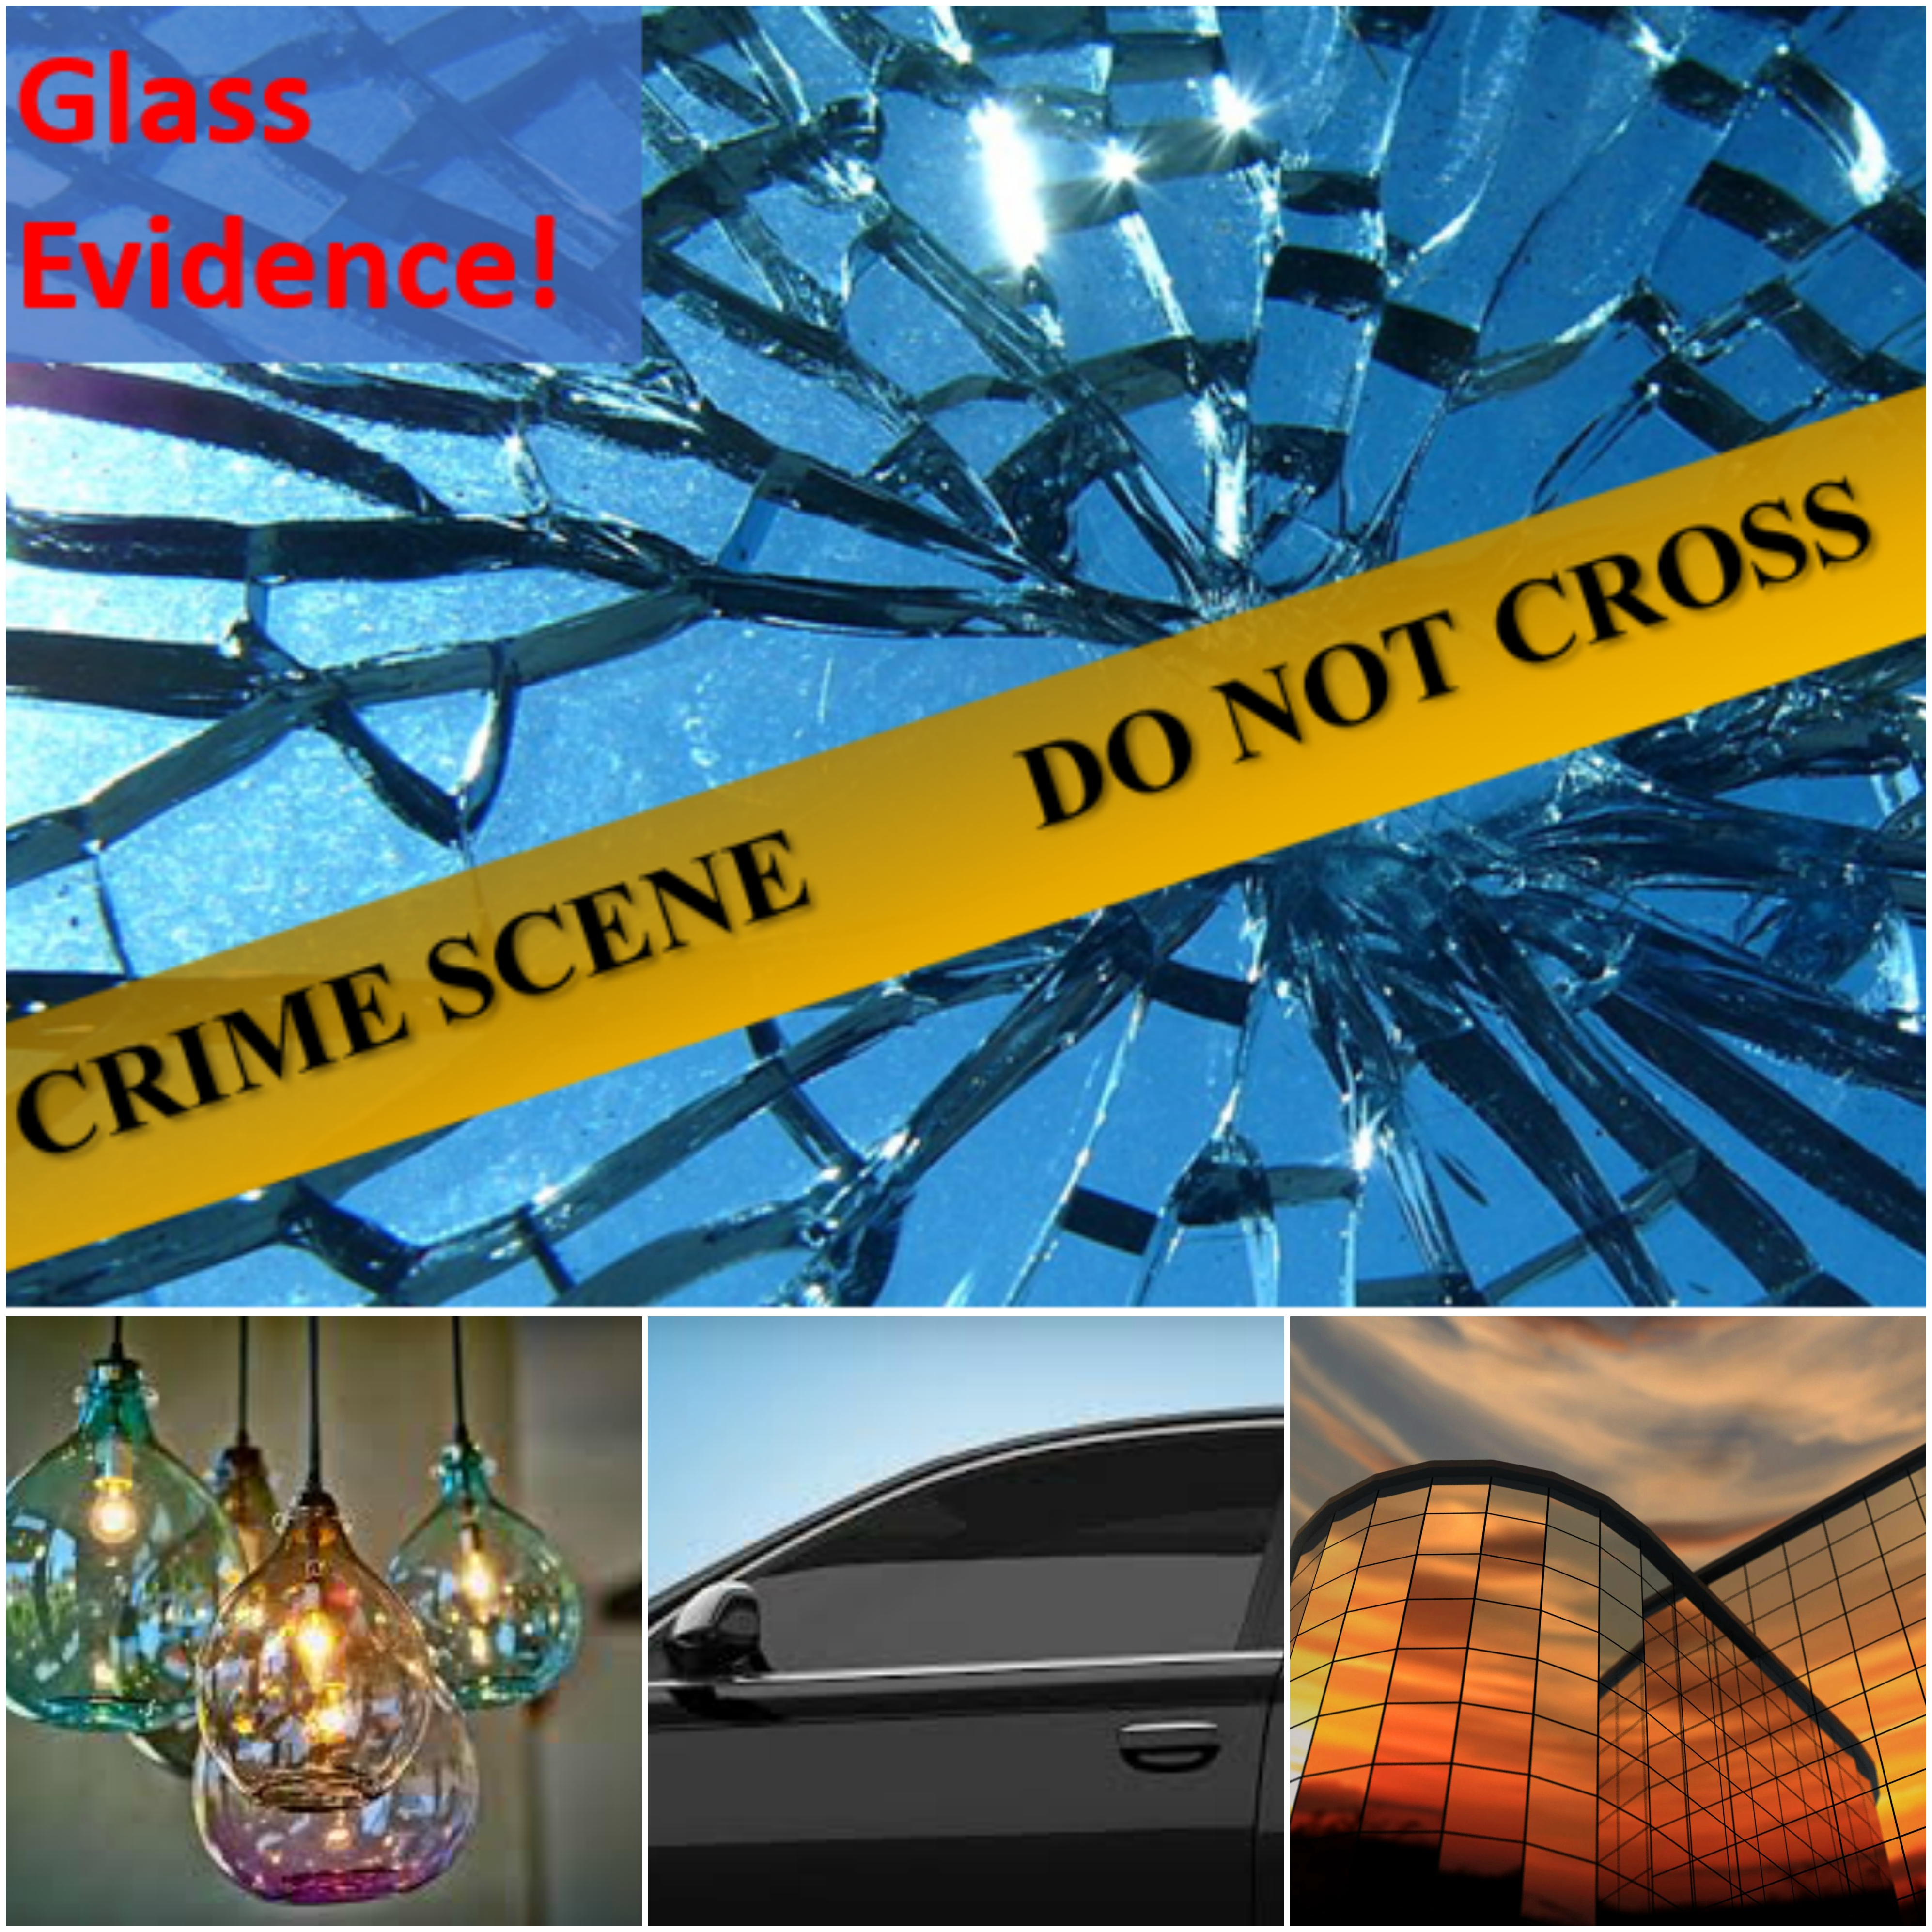

## Glass Identification
Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


In [3]:
Data.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

**Now that we have got a glimpse of the dataset, we know that it doesn't have any null values and all the attributes are numerical. Even the type which is categorical in nature is represented as integers. Please note there is no order among the classes**


## Exploratory Data Analyses

Let us check how many instances of each type are there in our dataset

Text(0.5, 1.0, 'Count of Glass Types')

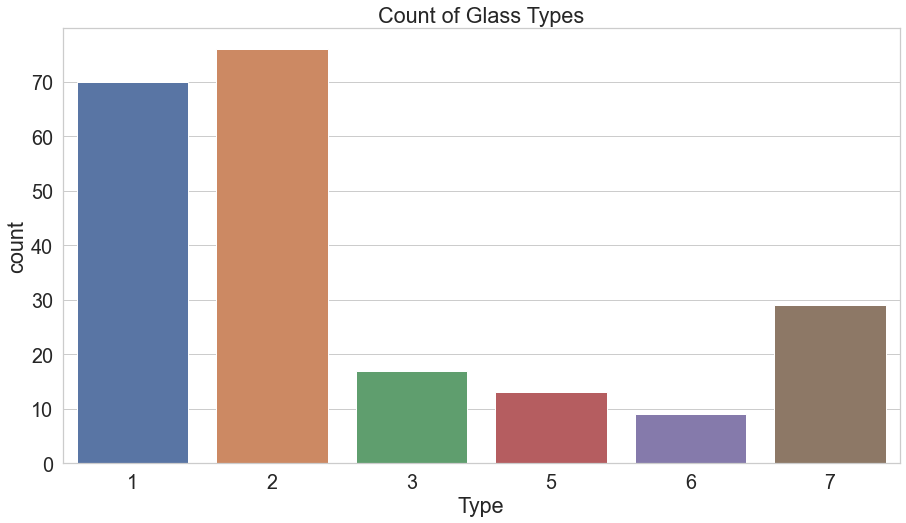

In [4]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=Data).set_title('Count of Glass Types')

We see that Type 2 and 1 have the highest occurences in the dataset, so we need to make sure that the train and test dataset have a good representation from all the types. The dataset source is forensic sciences department and probably the reason of the high count of type 1 & 2 is that many criminals break through building window glasses at the scene rather than breaking containers or tableware.

In [5]:
# Checked both mean and median. mean seemed more informative
Data.groupby('Type', as_index=False).mean()

Type        RI         Na        Mg        Al         Si         K  \
0     1  1.518718  13.242286  3.552429  1.163857  72.619143  0.447429   
1     2  1.518619  13.111711  3.002105  1.408158  72.598026  0.521053   
2     3  1.517964  13.437059  3.543529  1.201176  72.404706  0.406471   
3     5  1.518928  12.827692  0.773846  2.033846  72.366154  1.470000   
4     6  1.517456  14.646667  1.305556  1.366667  73.206667  0.000000   
5     7  1.517116  14.442069  0.538276  2.122759  72.965862  0.325172   

          Ca        Ba        Fe  
0   8.797286  0.012714  0.057000  
1   9.073684  0.050263  0.079737  
2   8.782941  0.008824  0.057059  
3  10.123846  0.187692  0.060769  
4   9.356667  0.000000  0.000000  
5   8.491379  1.040000  0.013448

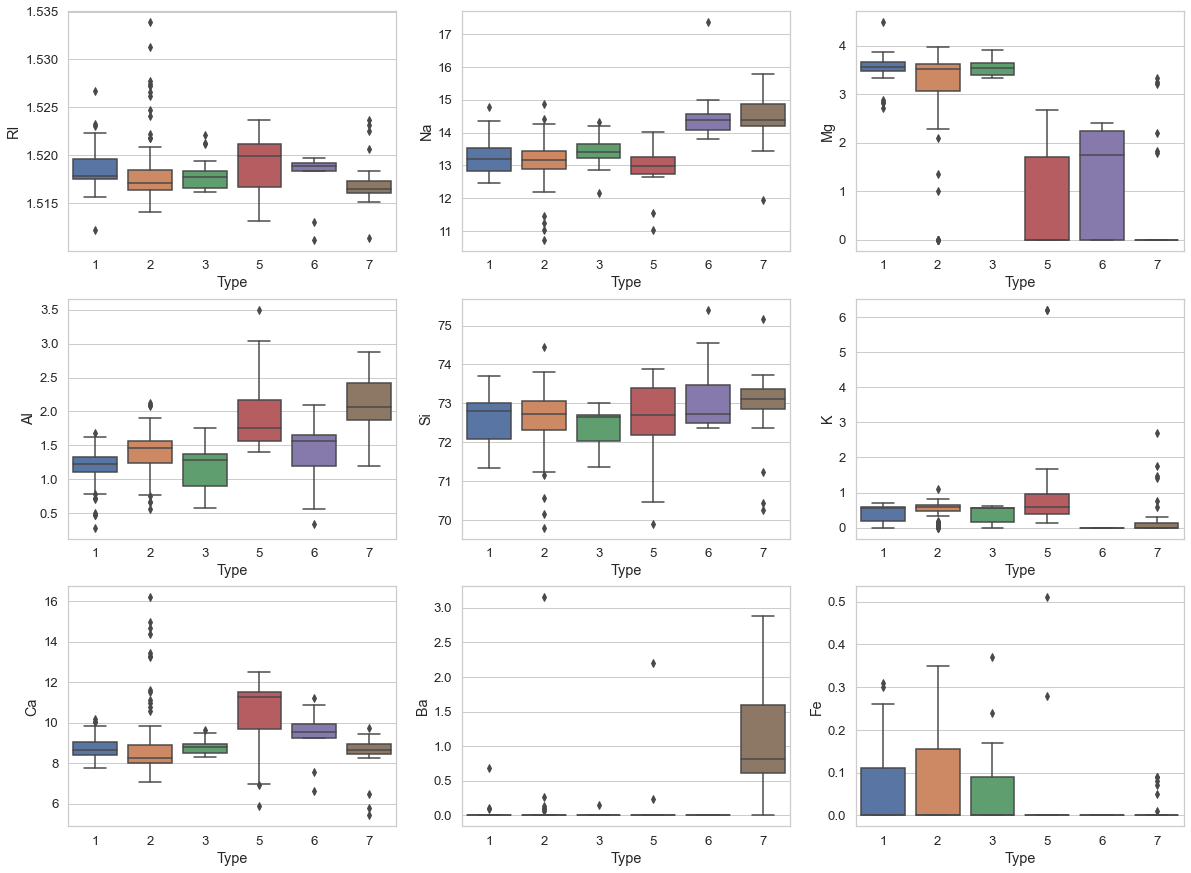

In [6]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=Data)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=Data)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=Data)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=Data)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=Data)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=Data)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=Data)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=Data)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=Data)
plt.show()

 The box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest. This is because Iron is added mainly in colored glasses.

We got some idea on which feature provides more insight in differentiating one type from another. Now, let's see the relationship between each one of them through a pairplot. (We will leave out K, Ba and Fe due to sparse concentration)

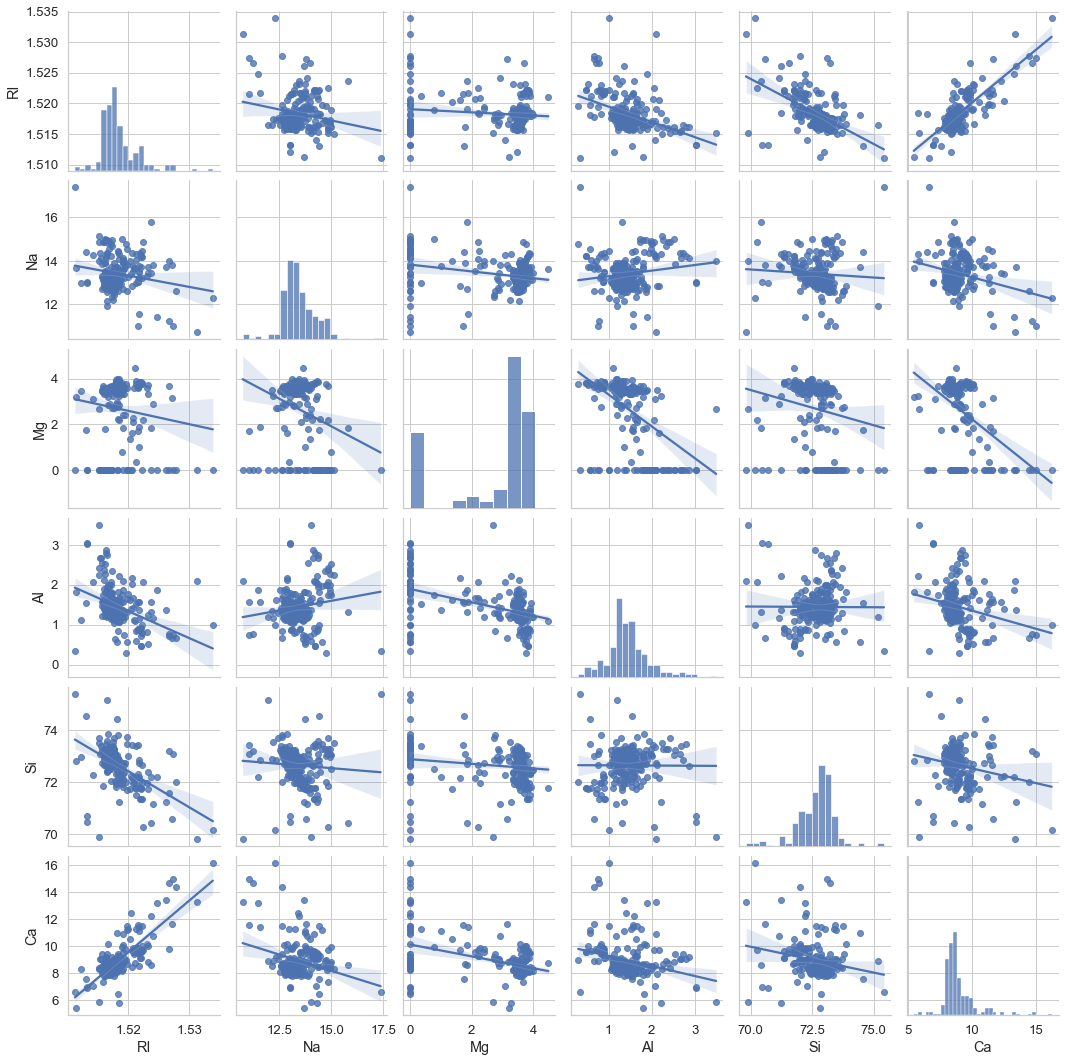

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(Data[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship.

Type 1,2 & 3 have very similar properties. However, we can distinguish them based on whether they are flat or not. Basically, float process is used to flatten the glass into sheets. Let us see the density plot of flat vs non-flat glass on some of the properties.

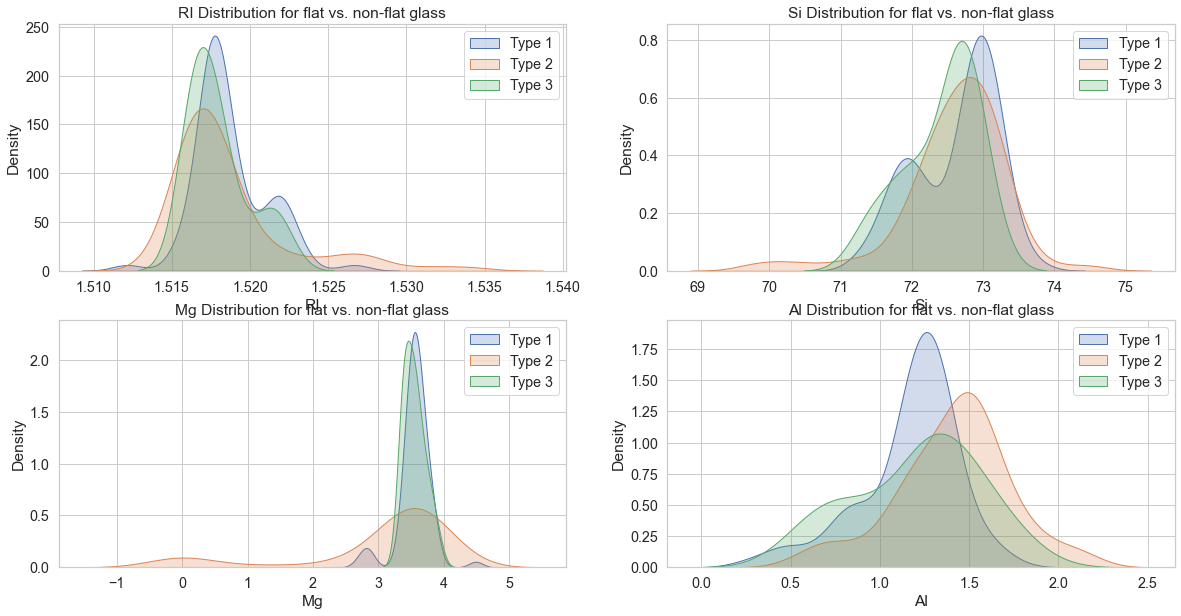

In [8]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(Data["RI"][Data.Type == 1], shade = True)
sns.kdeplot(Data["RI"][Data.Type == 2], shade = True)
sns.kdeplot(Data["RI"][Data.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(Data["Si"][Data.Type == 1], shade = True)
sns.kdeplot(Data["Si"][Data.Type == 2], shade = True)
sns.kdeplot(Data["Si"][Data.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(Data["Mg"][Data.Type == 1], shade = True)
sns.kdeplot(Data["Mg"][Data.Type == 2], shade = True)
sns.kdeplot(Data["Mg"][Data.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(Data["Al"][Data.Type == 1], shade = True)
sns.kdeplot(Data["Al"][Data.Type == 2], shade = True)
sns.kdeplot(Data["Al"][Data.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

## Feature Selection using PCA

Let us plot a correlation heatmap to identify multicollinearity

<AxesSubplot:>

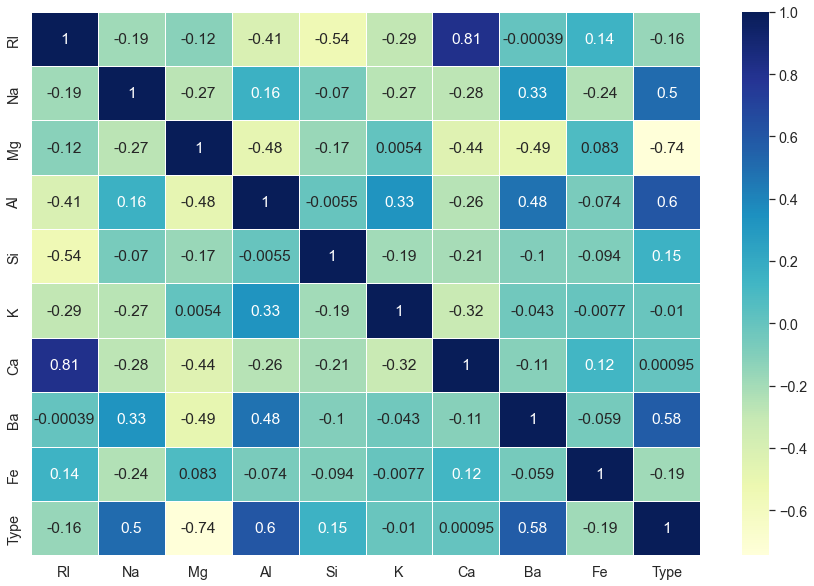

In [9]:
plt.subplots(figsize=(15,10))
sns.heatmap(Data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels.

Let us look at a powerful method called Principal component analysis to decide on the candidate variables. This is valuable as it can help in dimension reduction and lower the cost of data collection.

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


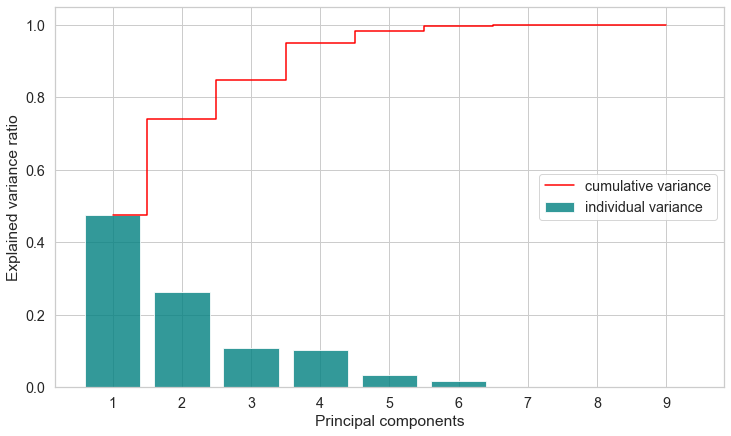

In [10]:
# Performing PCA
X_var = Data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

The first 5 components account for about 99% of the total explained variance. We can run the analysis again only with these five components.

In [11]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

Now that we have our features and target labels, let us proceed to model development

## Model Development

In [12]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = Data["Type"].values

In [13]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [14]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


## Running final model

In [15]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.6923076923076923

## Model Performance

Text(197.86, 0.5, 'predicted label')

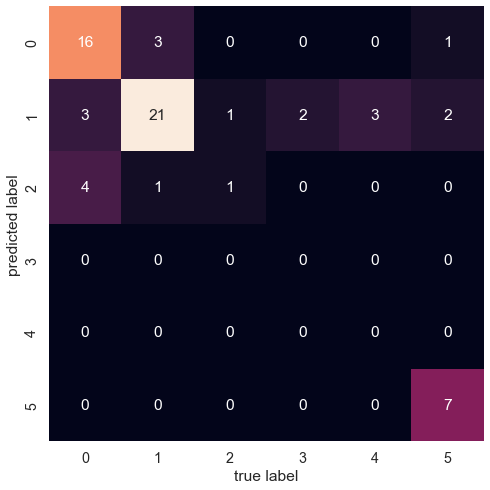

In [16]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

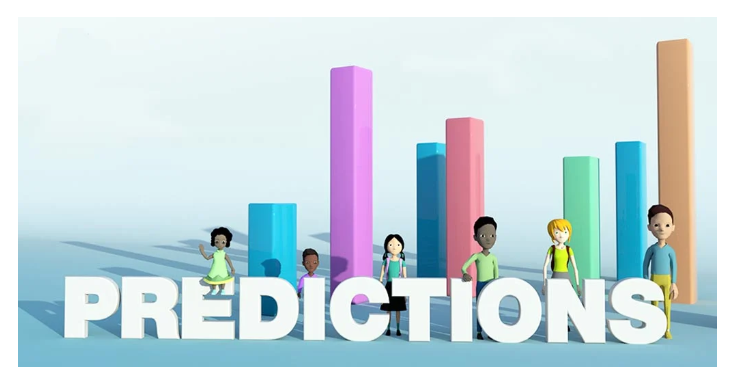

# Student grades prediction

###  Project Description

**The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns**


- Seat No : The enrolled number of candidate that took the exams

#### CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
**Predict - CGPA of a student based on different grades in four years.**


In [17]:
grade_df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
grade_df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

###   Let us inspect the data

#### Data exploration

In [18]:
grade_df.shape

(571, 43)

In [19]:
grade_df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [20]:
grade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [21]:
grade_df.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

 minimum **CGPA** is 0.80 & maximum **CGPA** is 3.98

In [22]:
 grade_df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [23]:
grade_df.isnull().sum().sum()

425

### Clean The Data

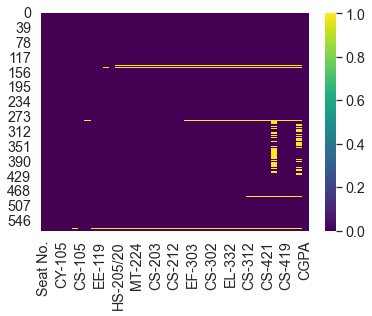

In [24]:
# Check if there is any missing value

sns.heatmap(grade_df.isnull(), cmap='viridis')
plt.show()

In [25]:
grade_df.replace(np.nan,0, inplace = True)
grade_df.head(10)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
5  CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
6  CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
7  CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
8  CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
9  CS-97010      A      B     C+         B      B     A-      C     B-     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
5  ...      C     B-     C+     C+     A-     A-     B+     B-      B  3.026  
6  ...     B-      C     B+     B-      A     A-     B+     B+      A  2.957  
7  ...     D+     B+     B+      C      A     B+     A-     A-     A-  3.043  
8  ...     B+      B     B-     C+      A     A-     B+     A-      A  3.358  
9  ...     C+     B-     B+     B-      A      A     A-      B      A  3.247  

[10 rows x 43 columns]

In [26]:
input =grade_df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = grade_df[["CGPA"]]
target.head()

CGPA
0  2.205
1  2.008
2  3.608
3  1.906
4  3.448

In [27]:
pd.unique(grade_df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [28]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}
type(input)     

pandas.core.frame.DataFrame

In [29]:
for item in input:
      input[item] = input[item].replace(grades_enc)

input.head()

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0     2.7     1.4     1.7        2.0     1.7     1.4     1.0     1.7     2.7   
1     4.0     1.0     1.4        1.0     2.7     2.0     1.0     4.0     1.4   
2     4.0     3.0     4.0        2.7     3.4     4.0     2.7     3.4     3.7   
3     1.0     2.4     1.4        1.0     1.0     3.7     1.4     1.7     1.0   
4     3.7     3.7     3.7        3.4     4.0     4.0     3.7     3.4     4.0   

   ME-107  ...  EF-303  HS-304  CS-301  CS-302  TC-383  EL-332  CS-318  \
0     1.7  ...     1.7     2.4     3.0     2.0     2.4     2.0     1.7   
1     1.0  ...     1.0     1.7     3.7     1.4     1.7     2.0     3.7   
2     3.7  ...     2.4     4.0     3.4     3.7     3.0     3.4     3.7   
3     2.4  ...     1.0     2.7     1.0     2.7     1.4     1.4     3.4   
4     3.7  ...     1.7     3.7     2.7     3.7     2.4     3.7     2.7   

   CS-306  CS-312  CS-317  
0     2.0     1.7     1.7  
1     1.0     1.4     1.0  
2     3.7     3.0     3.0  
3     1.7     1.4     2.0  
4     3.7     2.7     3.4  

[5 rows x 33 columns]

In [30]:
# Concating inputs and targets for data insights
df = pd.concat([input, target], axis=1)


# Discover and Visualize the Data to Gain Insights

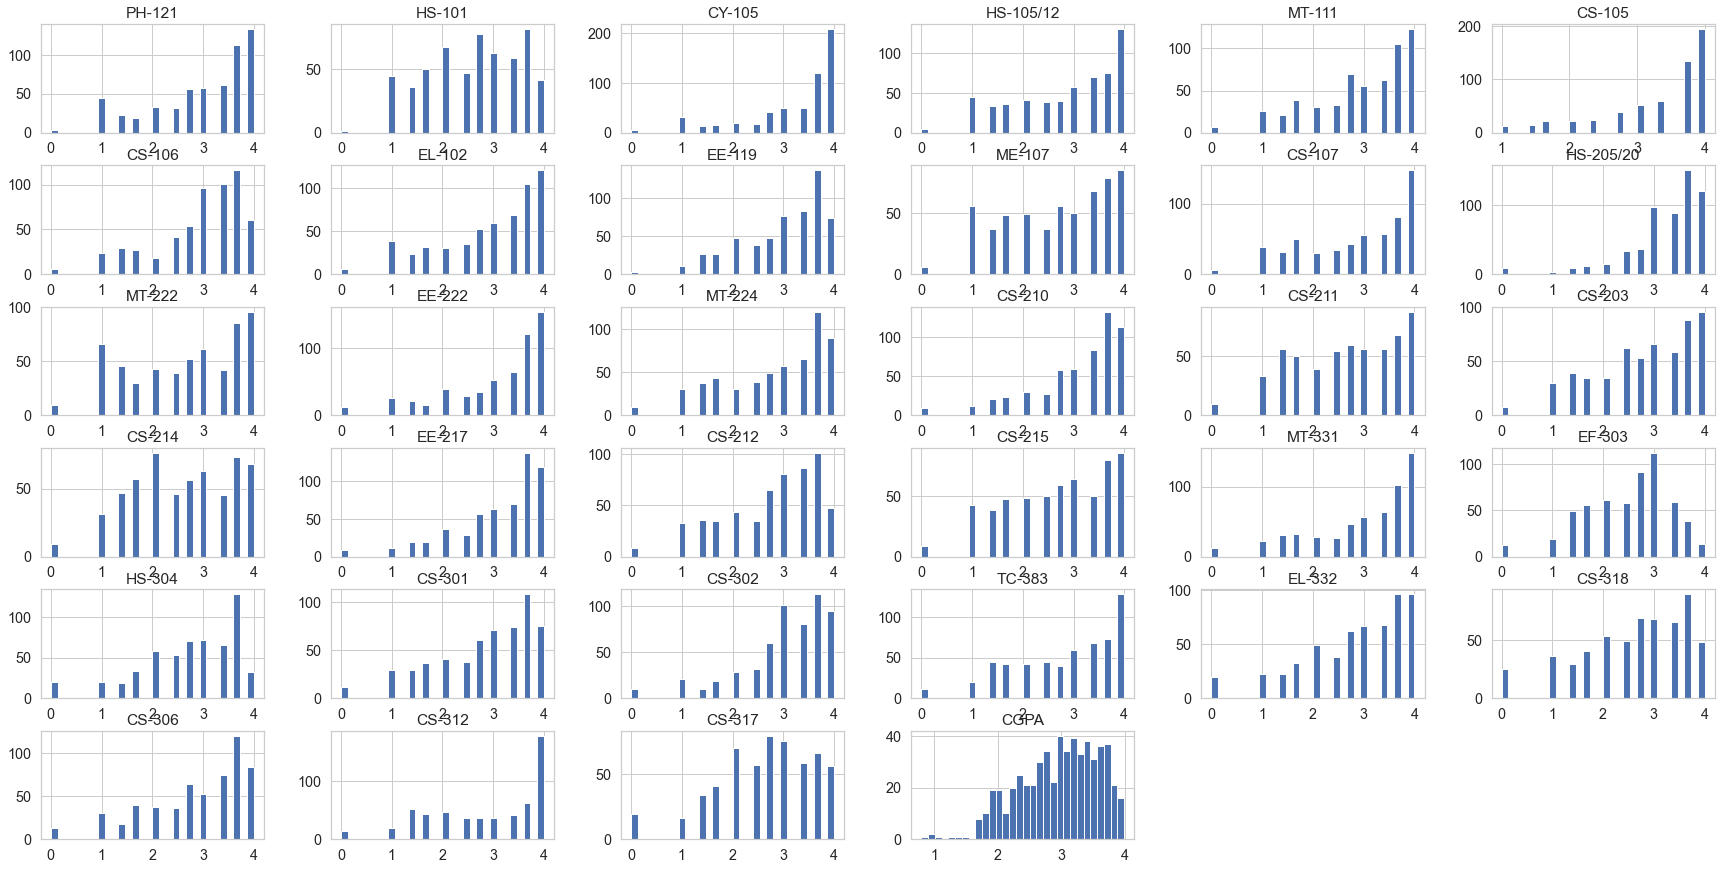

In [31]:
df.hist(bins=30,figsize=(30,15))
plt.show()

## Looking for Correlations

<AxesSubplot:>

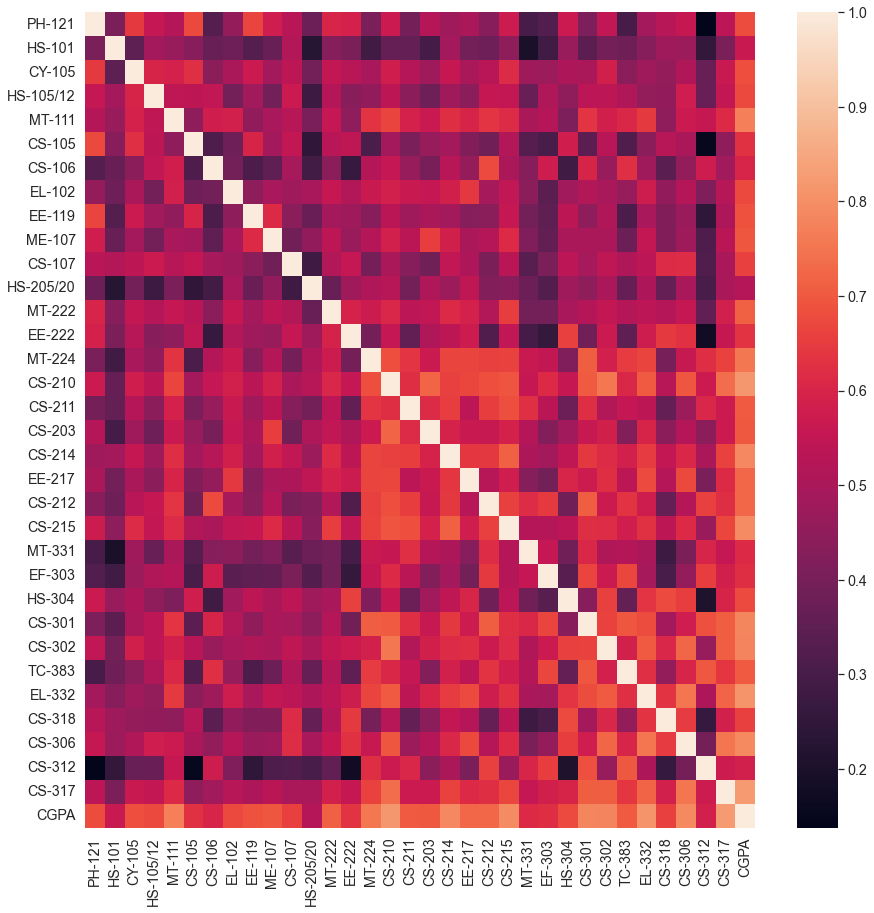

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [33]:
grade_df.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

In [34]:
grade_df.to_csv('cleaned_data.csv')

In [35]:
# Splitting file into different columns based on our model prediction requirement
model1_columns = []
model2_columns = []
model3_columns = []
model4_columns = []
for item in [input]:
    for i in item:
        if i[3]=='1':
            model1_columns.append(i)
        elif i[3]=='2':
            model2_columns.append(i)
        elif i[3]=='3':
            model3_columns.append(i)
        else:
            model4_columns.append(i)

model2_columns = model1_columns + model2_columns
model3_columns = model2_columns + model3_columns
model4_columns = model3_columns + model4_columns

# Prepare the data for Linear Regression:

## Model 1: Predict final CGPA based on GPs of first year only.

In [36]:
# Input data
labels = df['CGPA'].values
features = df[list(model1_columns)].values

In [37]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [38]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_1 = linear_model.LinearRegression()

# Train the Model
lr_1.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict for training set
y_train_predict = lr_1.predict(X_train)

# Predict for training set
y_test_predict = lr_1.predict(X_test)

In [40]:
input_lr=[]
input_lr.append([4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4])
print(input_lr )
print(lr_1.predict(input_lr ))

[[4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4]]
[1.85797254]


In [41]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_1.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.23011956288589216
MAE is 0.17907097636312228
---------------------------------------
The model performance for testing set
RMSE is 0.24788432163416915
MAE is 0.18653398156549653
---------------------------------------
The score of model for testing set
Test score 0.84


In [42]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

Actual   Predict
0     2.003  2.385015
1     3.656  3.639451
2     2.659  3.109901
3     2.146  2.319872
4     3.339  3.272307
..      ...       ...
167   3.641  3.474648
168   2.763  2.768328
169   2.711  3.069276
170   3.840  3.789548
171   3.350  3.653919

[172 rows x 2 columns]

In [43]:
 #Visualize the Result
idx= np.random.choice(X_test.shape[0])
print ("Predicted CGPA :", y_test_predict[idx])
print ("Actual CGPA :", y_test[idx])

Predicted CGPA : 3.3282935077375653
Actual CGPA : 3.09


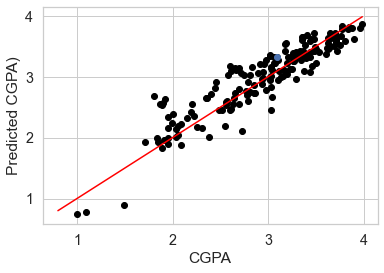

In [44]:
# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA)')
plt.plot([df["CGPA"].min(), df["CGPA"].max()], [df["CGPA"].min(), df["CGPA"].max()], color='red')
plt.show()

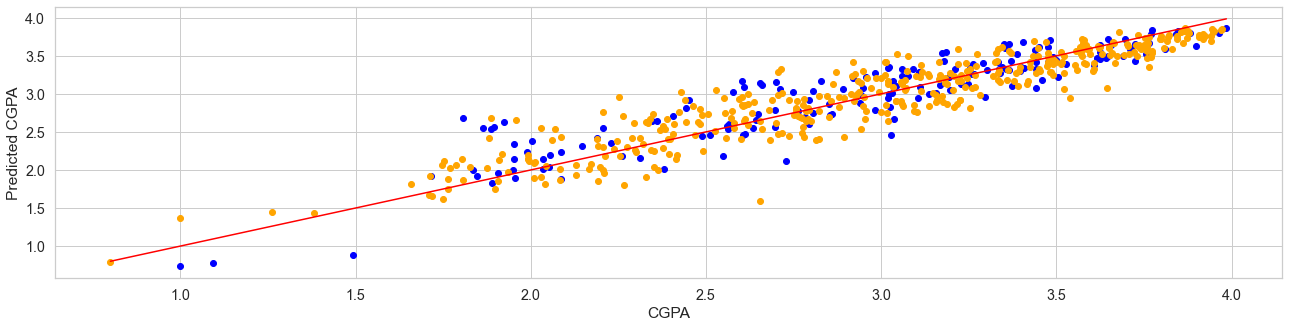

In [45]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

# Model 2: Predict  final  CGPA  based  on  GPs  of  first  two  years. 

In [46]:
# Input data
labels = df['CGPA'].values
features = df[list(model2_columns)].values

In [47]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [48]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_2 = linear_model.LinearRegression()

# Train the Model
lr_2.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict for training set
y_train_predict = lr_2.predict(X_train)

# Predict for training set
y_test_predict = lr_2.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_2.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.15972438516807635
MAE is 0.11406813820359603
---------------------------------------
The model performance for testing set
RMSE is 0.21015194698023013
MAE is 0.14497764377046798
---------------------------------------
The score of model for testing set
Test score 0.89


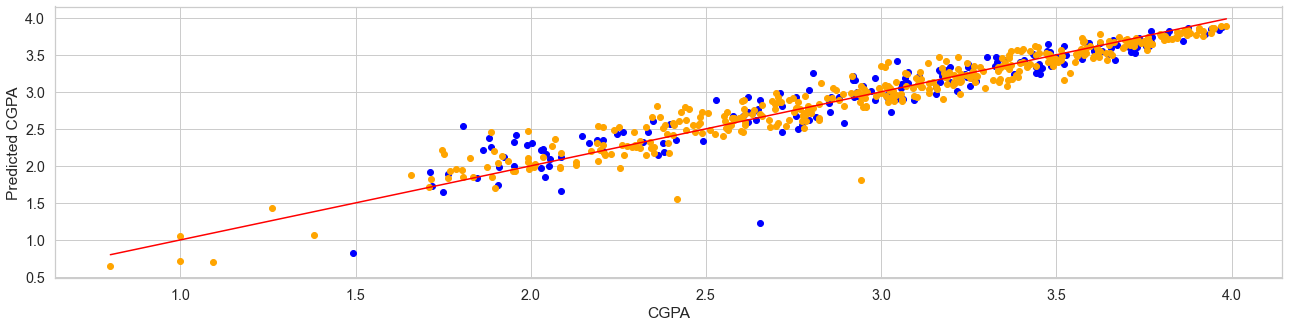

In [51]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

# Model 3: Predict final CGPA based on GPs of first three years

In [52]:
# Input data
labels = df['CGPA'].values
features = df[list(model3_columns)].values

In [53]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [54]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_3 = linear_model.LinearRegression()

# Train the Model
lr_3.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict for training set
y_train_predict = lr_3.predict(X_train)

# Predict for training set
y_test_predict = lr_3.predict(X_test)

In [56]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_3.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.14043165276867306
MAE is 0.08675805743044142
---------------------------------------
The model performance for testing set
RMSE is 0.13662861728461956
MAE is 0.09151392221214426
---------------------------------------
The score of model for testing set
Test score 0.95


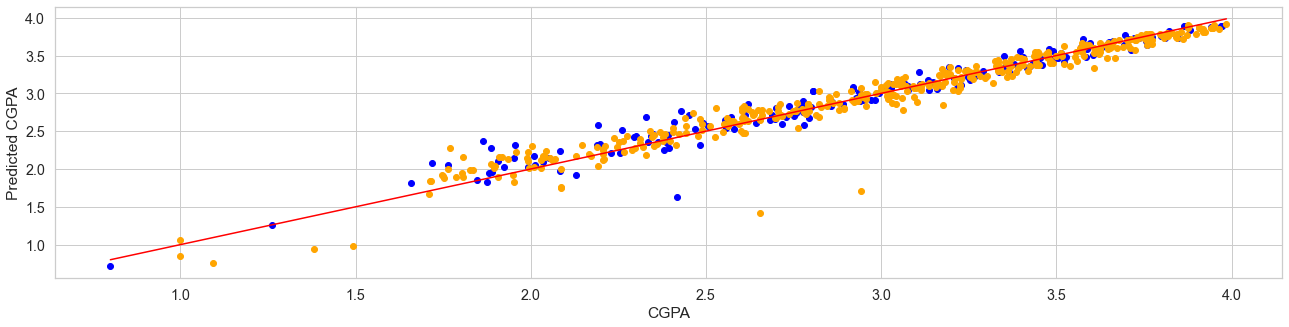

In [57]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

# Model 4: Predict final CGPA based on GPs of last four years

In [58]:
# Input data
labels = df['CGPA'].values
features = df[list(model4_columns)].values

In [59]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [60]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_4 = linear_model.LinearRegression()

# Train the Model
lr_4.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predict for training set
y_train_predict = lr_4.predict(X_train)

# Predict for training set
y_test_predict = lr_4.predict(X_test)

In [62]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_4.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.15187702674661552
MAE is 0.09425347452760936
---------------------------------------
The model performance for testing set
RMSE is 0.1023204050902614
MAE is 0.08011170207763318
---------------------------------------
The score of model for testing set
Test score 0.97


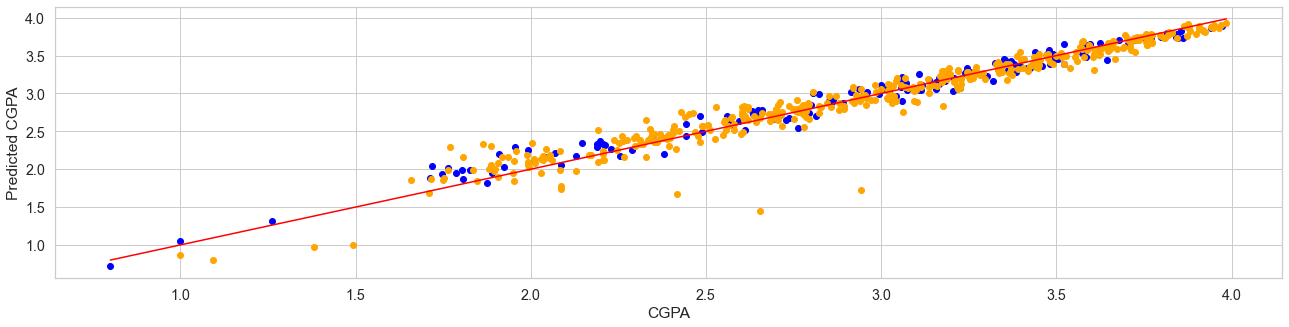

In [63]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

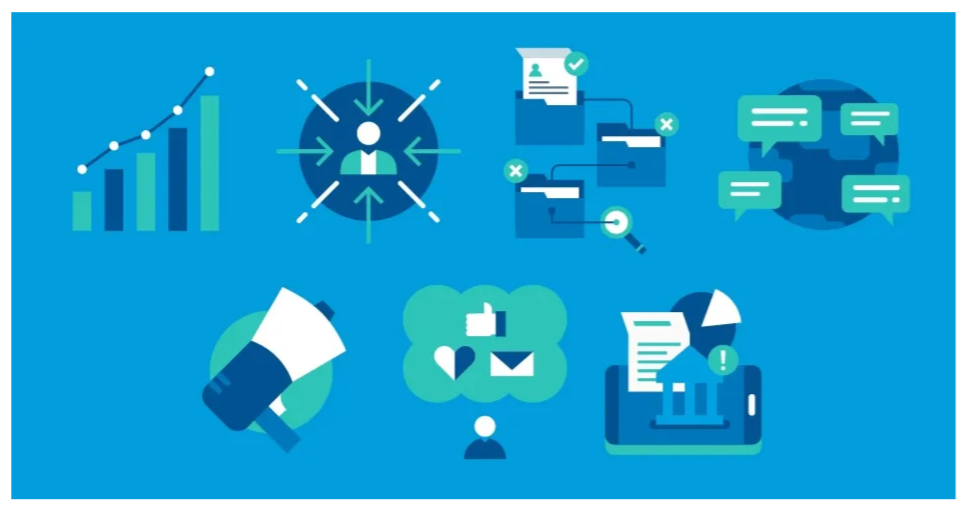

# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXEDDEPOSIT) or not.

### Business Use Case


There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


## Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


### About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

## Dataset Attributes

Here is the description of all the variables:

•	Variable: Definition

•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign


## Output variable (desired target):

•	**Subscribed (target):** has the client subscribed a term deposit? (YES/NO)

In [64]:
train= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
train

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [65]:
test= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
test

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

**_Checking the columns of each dataset_**

In [66]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [67]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [70]:
train.shape

(31647, 18)

In [71]:
test.shape

(13564, 17)

_Hence, we can see that we have 17 similar features in the both the dataset and 'Subscribed' is the variable that is to be predicted_

# Data Exploration

In [72]:
#Printing the first 5 rows of the train dataset
train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [73]:
#Printing the first 5 rows of the test dataset
test.head()

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

In [74]:
#checking for missing values in train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [75]:
#Checking for missing values in test dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

### _Analysis of 'Subscribed' variable_

In [76]:
#Frequency of 'subscribed'
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

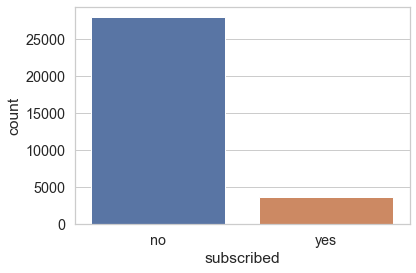

In [77]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

In [78]:
#Normalizing the frequency table of 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

#### _From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%_

### Analysing the 'Job' variable

In [79]:
#Frequency table
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

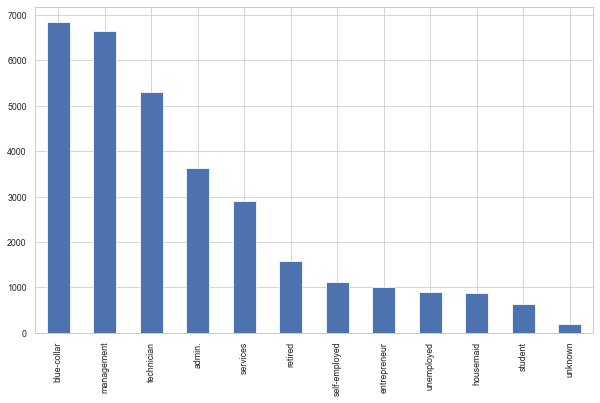

In [80]:
# Plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

- We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general

## Analysis of 'marital' status

In [81]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

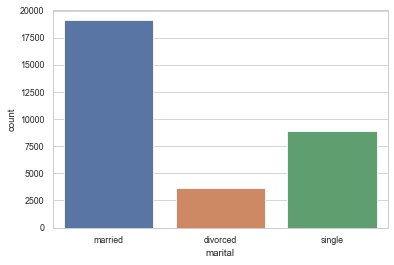

In [82]:
sns.countplot(data=train, x='marital');

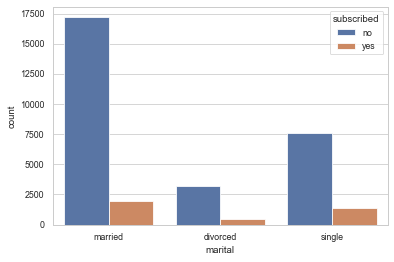

In [83]:
sns.countplot(data=train, x='marital', hue='subscribed');

### Analyzing the 'age' variable

<AxesSubplot:xlabel='age', ylabel='Density'>

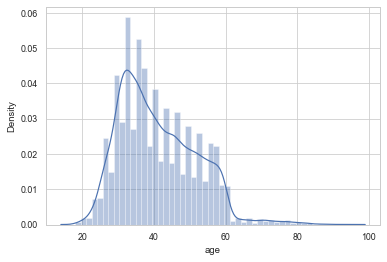

In [84]:
sns.distplot(train['age'])

We can infer that most of the clients fall in the age group between 20-60.

### Bivariate Analysis

In [85]:
#job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [86]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

<AxesSubplot:xlabel='job'>

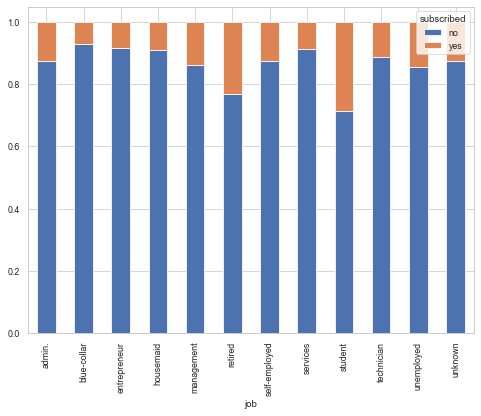

In [87]:
job_norm.plot.bar(stacked=True,figsize=(8,6))

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [88]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed     no   yes
marital                
divorced     3185   445
married     17176  1919
single       7571  1351

In [89]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed        no       yes
marital                       
divorced    0.877410  0.122590
married     0.899502  0.100498
single      0.848577  0.151423

<AxesSubplot:xlabel='marital'>

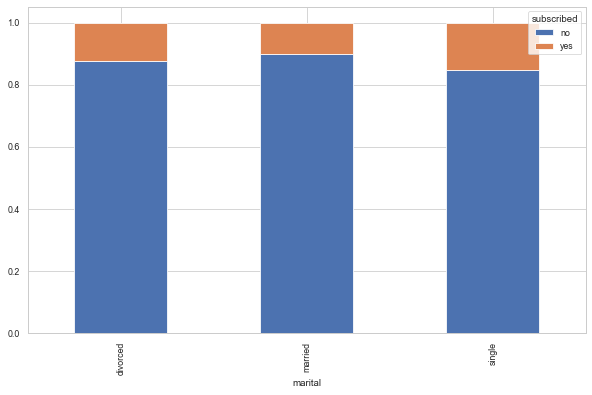

In [90]:
marital_norm.plot.bar(stacked=True, figsize=(10,6))

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

In [91]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed     no   yes
default                
no          27388  3674
yes           544    41

In [92]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed        no       yes
default                       
no          0.881720  0.118280
yes         0.929915  0.070085

<AxesSubplot:xlabel='default'>

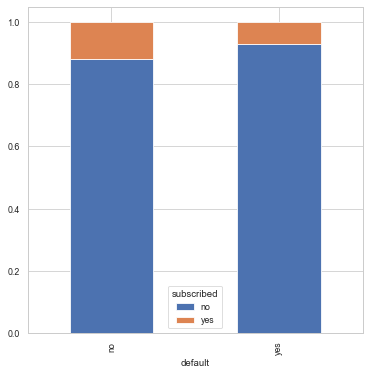

In [93]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [94]:
# Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [95]:
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [96]:
#Correlation matrix
tc = train.corr()
tc

ID       age   balance       day  duration  campaign  \
ID          1.000000  0.013337  0.067897 -0.063399  0.007183 -0.103508   
age         0.013337  1.000000  0.103245 -0.011056 -0.003870  0.005733   
balance     0.067897  0.103245  1.000000  0.003461  0.024274 -0.012032   
day        -0.063399 -0.011056  0.003461  1.000000 -0.032288  0.159168   
duration    0.007183 -0.003870  0.024274 -0.032288  1.000000 -0.080305   
campaign   -0.103508  0.005733 -0.012032  0.159168 -0.080305  1.000000   
pdays       0.436148 -0.021947  0.001789 -0.087626  0.000529 -0.087570   
previous    0.254476  0.005761  0.013843 -0.048752  0.001783 -0.033151   
subscribed  0.296663  0.024538  0.050807 -0.029600  0.389838 -0.070607   

               pdays  previous  subscribed  
ID          0.436148  0.254476    0.296663  
age        -0.021947  0.005761    0.024538  
balance     0.001789  0.013843    0.050807  
day        -0.087626 -0.048752   -0.029600  
duration    0.000529  0.001783    0.389838  
campaign   -0.087570 -0.033151   -0.070607  
pdays       1.000000  0.428938    0.108290  
previous    0.428938  1.000000    0.088081  
subscribed  0.108290  0.088081    1.000000

<AxesSubplot:>

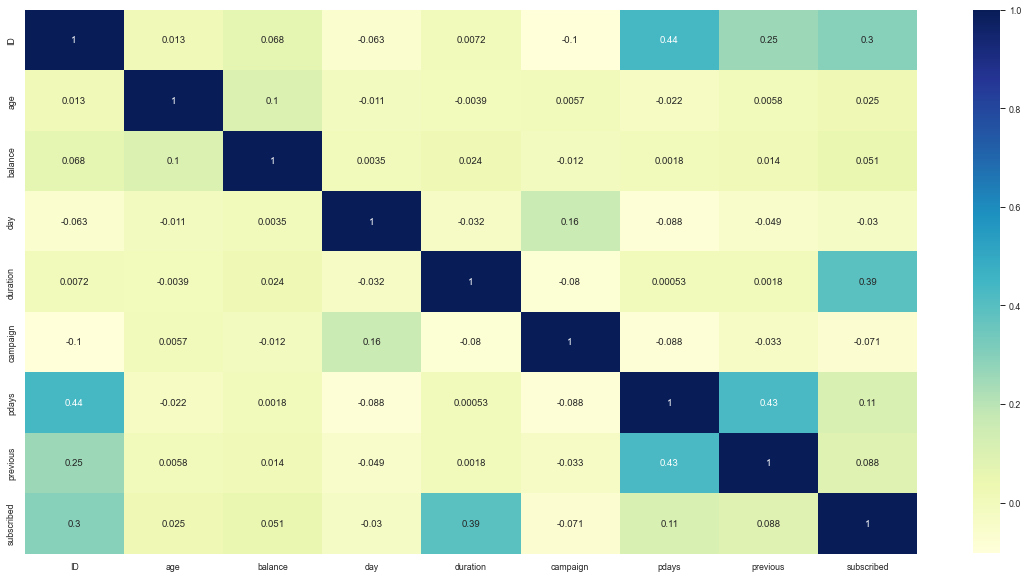

In [97]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

## Model Building

In [98]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [99]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train

ID  age  balance  day  duration  campaign  pdays  previous  \
0      26110   56     1933   19        44         2     -1         0   
1      40576   31        3   20        91         2     -1         0   
2      15320   27      891   18       240         1     -1         0   
3      43962   57     3287   22       867         1     84         3   
4      29842   31      119    4       380         1     -1         0   
...      ...  ...      ...  ...       ...       ...    ...       ...   
31642  36483   29        0   12       116         2     -1         0   
31643  40178   53      380    5       438         2     -1         0   
31644  19710   32      312    7        37         3     -1         0   
31645  38556   57      225   15        22         7    337        12   
31646  14156   55      204   11      1973         2     -1         0   

       job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0               1                0  ...          0          0          0   
1               0                0  ...          0          0          0   
2               0                0  ...          0          0          0   
3               0                0  ...          1          0          0   
4               0                0  ...          0          0          0   
...           ...              ...  ...        ...        ...        ...   
31642           0                0  ...          0          0          1   
31643           0                0  ...          1          0          0   
31644           0                0  ...          0          0          0   
31645           0                0  ...          0          0          1   
31646           0                0  ...          0          0          0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0              1          0          0                 0               0   
1              0          0          0                 0               0   
2              0          0          0                 0               0   
3              0          0          0                 0               0   
4              0          0          0                 0               0   
...          ...        ...        ...               ...             ...   
31642          0          0          0                 0               0   
31643          0          0          0                 0               0   
31644          0          0          0                 0               0   
31645          0          0          0                 1               0   
31646          0          0          0                 0               0   

       poutcome_success  poutcome_unknown  
0                     0                 1  
1                     0                 1  
2                     0                 1  
3                     1                 0  
4                     0                 1  
...                 ...               ...  
31642                 0                 1  
31643                 0                 1  
31644                 0                 1  
31645                 0                 0  
31646                 0                 1  

[31647 rows x 52 columns]

Splitting the data into train and validation set such as to validate the results of our model on the validation set. keeping 20% of the dataset as our validation set and the rest as our training set.

In [100]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

#### **_Now our data is ready_** 